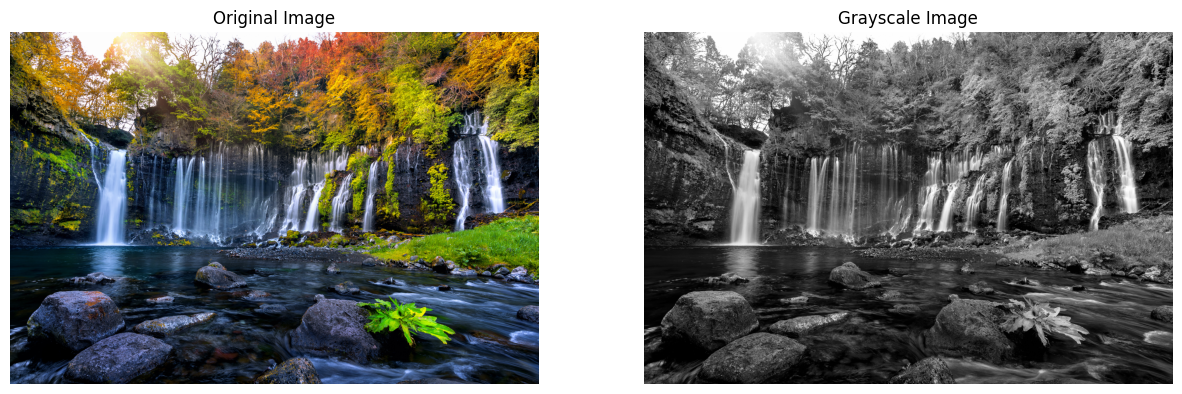

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# output folders exist
output_dirs = {
    "reduced_levels": "outputs/reduced_levels",
    "averaging": "outputs/averaging",
    "rotation": "outputs/rotation",
    "block_averaging": "outputs/block_averaging"
}

# Create output directories if they do not exist
for folder in output_dirs.values():
    os.makedirs(folder, exist_ok=True)

# Load image
image_path = 'image.jpg' 
img_color = cv2.imread(image_path)
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


# Show Original Image
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Show Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()


### Image size reduction function

In [10]:
def resize_image(img, max_dim=512):
    h, w = img.shape[:2]
    scale = max_dim / max(h, w)
    return cv2.resize(img, (int(w * scale), int(h * scale)))


## 1. Reduce Intensity Levels

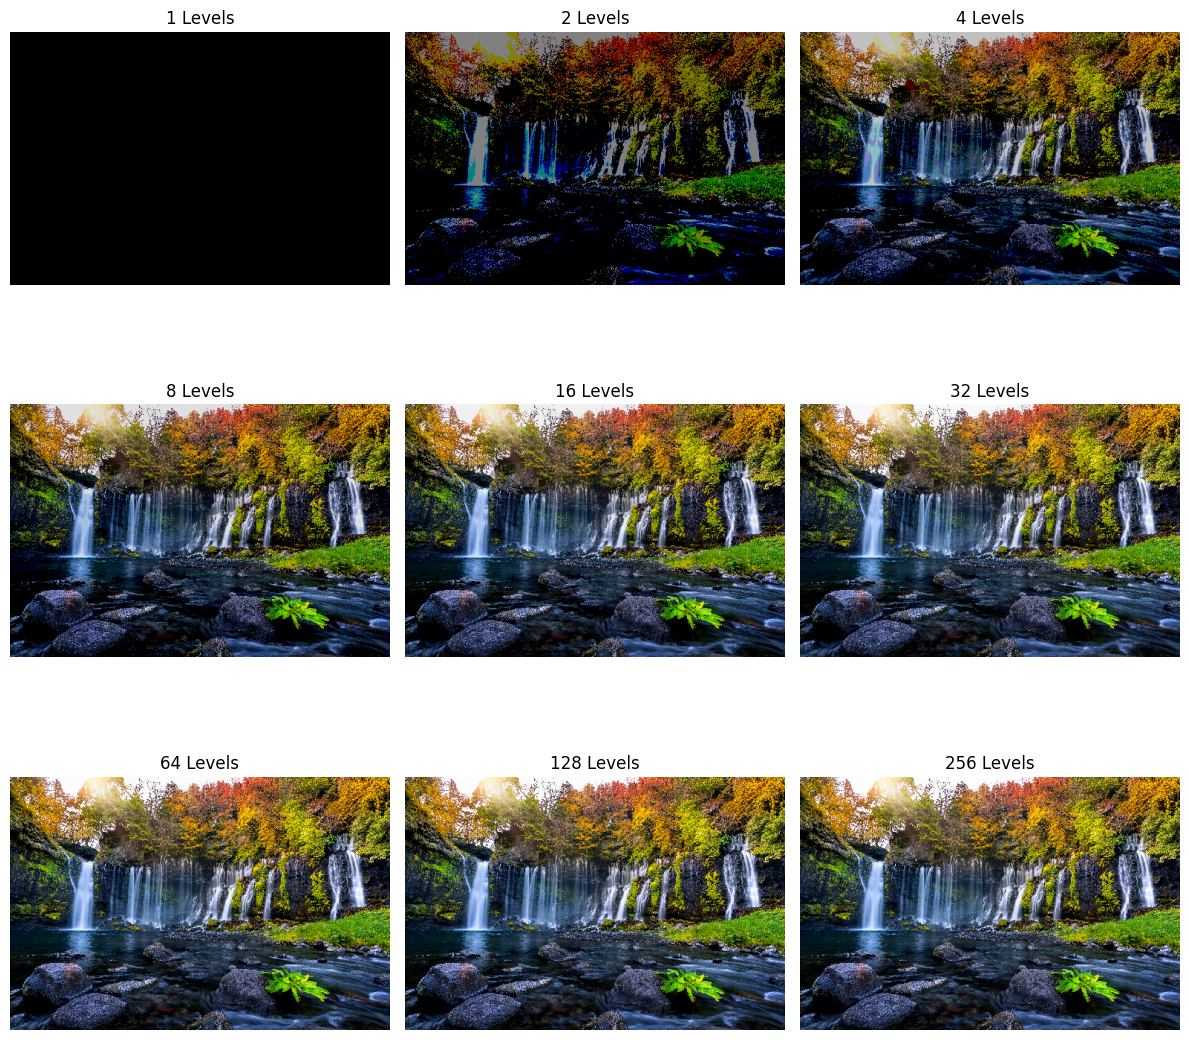

In [ ]:
def reduce_intensity_levels_color_subplot(img, levels_list):
    num_levels = len(levels_list)
    cols = 3
    rows = (num_levels + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = axes.flatten()

    for idx, level in enumerate(levels_list):
        step = 256 // max(1, level)
        reduced = ((img // step) * step).astype(np.uint8)
        resized = resize_image(reduced)

        # Save reduced image
        filename = f"outputs/reduced_levels/reduced_color_{level}_levels.png"
        cv2.imwrite(filename, resized)

        # Show in subplot
        axes[idx].imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
        axes[idx].set_title(f'{level} Levels')
        axes[idx].axis('off')

    # Hide unused subplots
    for i in range(len(levels_list), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Use it
reduce_intensity_levels_color_subplot(img_color, [1, 2, 4, 8, 16, 32, 64, 128, 256])


## 2. Spatial Averaging

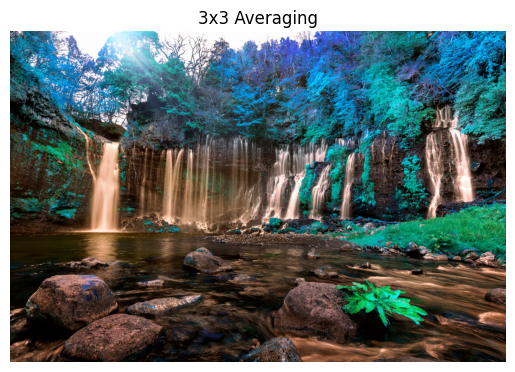

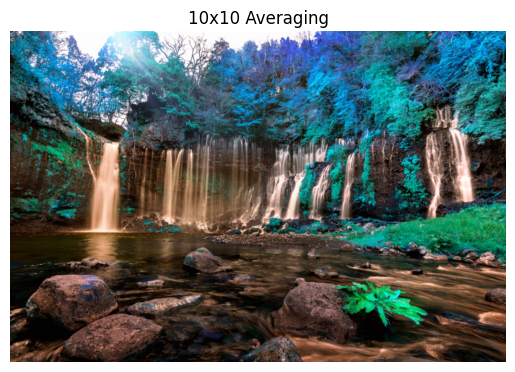

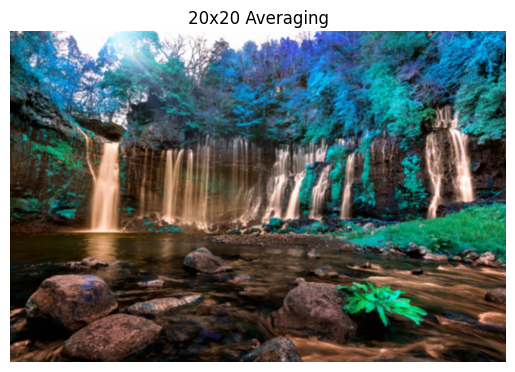

In [11]:
def average_filtering(img, kernel_size):
    blurred = cv2.blur(img, (kernel_size, kernel_size))
    filename = f"outputs/averaging/average_{kernel_size}x{kernel_size}.png"

    # Resize and save the blurred image
    resized = resize_image(blurred)
    cv2.imwrite(filename, resized)

    # Show the blurred image
    plt.imshow(blurred, cmap='gray')
    plt.title(f'{kernel_size}x{kernel_size} Averaging')
    plt.axis('off')
    plt.show()

# Apply for 3x3, 10x10, 20x20
for k in [3, 10, 20]:
    average_filtering(img_color, k)


## 3. Rotate Image by 45° and 90°

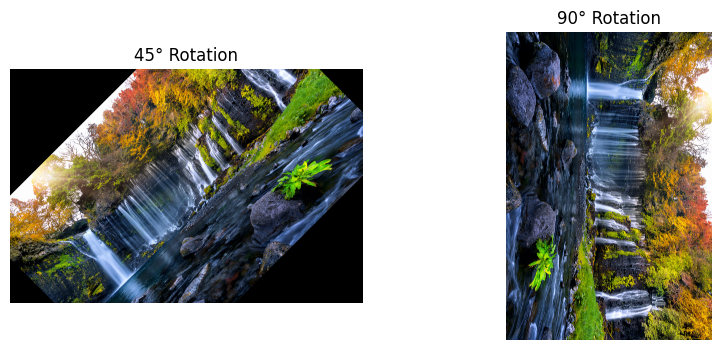

In [13]:
def rotate_image(img):
    h, w = img.shape[:2]
    
    # Rotate 45 degrees
    M_45 = cv2.getRotationMatrix2D((w // 2, h // 2), 45, 1)
    rotated_45 = cv2.warpAffine(img, M_45, (w, h))

    # Resize and save rotated image
    resized_45 = resize_image(rotated_45)
    cv2.imwrite("outputs/rotation/rotated_45.png", resized_45)
    
    # Rotate 90 degrees
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # Resize and save rotated image
    resized_90 = resize_image(rotated_90)
    cv2.imwrite("outputs/rotation/rotated_90.png", resized_90)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(rotated_45, cv2.COLOR_BGR2RGB))
    plt.title("45° Rotation")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(rotated_90, cv2.COLOR_BGR2RGB))
    plt.title("90° Rotation")
    plt.axis('off')
    plt.show()

rotate_image(img_color)


## 4. Block Averaging (Reduce Spatial Resolution)

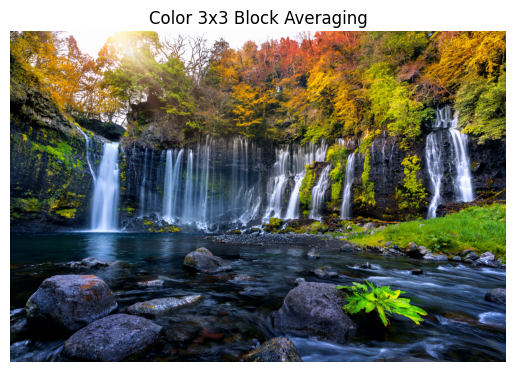

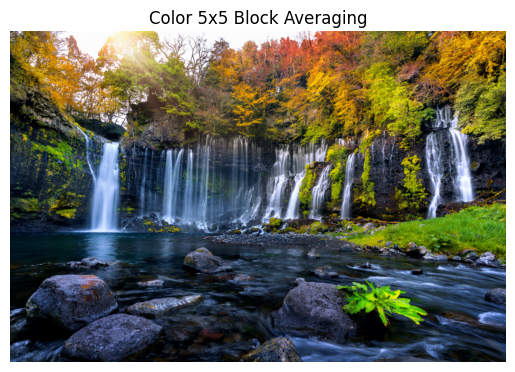

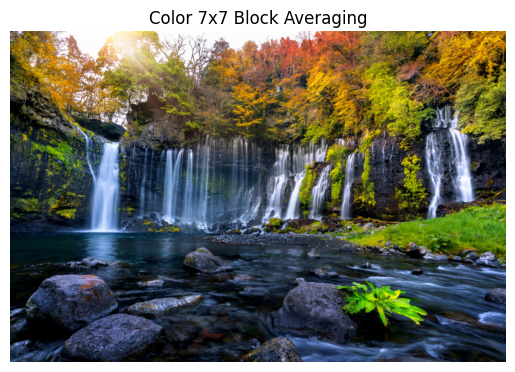

In [14]:
def block_average_color(img, block_size):
    h, w, c = img.shape
    output = img.copy()

    for i in range(0, h - block_size + 1, block_size):
        for j in range(0, w - block_size + 1, block_size):
            block = img[i:i + block_size, j:j + block_size]
            avg_color = np.mean(block.reshape(-1, 3), axis=0).astype(np.uint8)
            output[i:i + block_size, j:j + block_size] = avg_color

    filename = f"outputs/block_averaging/block_color_{block_size}x{block_size}.png"

    # Resize and save the output image
    resized = resize_image(output)
    cv2.imwrite(filename, resized)
    
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.title(f'Color {block_size}x{block_size} Block Averaging')
    plt.axis('off')
    plt.show()


for b in [3, 5, 7]:
    block_average_color(img_color, b)
